#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Clustering jerárquico

## Ejemplo primates (Izenman)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import os

sns.set()
%matplotlib inline


In [3]:
primate_scapulae = pd.read_csv('../data/primate.scapulae.csv')
primate_scapulae

,genus,AD.BD,AD.CD,EA.CD,Dx.CD,SH.ACR,EAD,beta,gamma,class_str,classdigit
0,54,65.56,166.0,50.55,12.80,70.3,115,14,45.0,Hylobates,1
1,54,50.91,93.9,61.82,13.09,75.0,121,20,54.0,Hylobates,1
2,54,46.15,80.8,64.10,11.80,70.0,120,25,61.0,Hylobates,1
3,54,70.29,220.5,50.00,12.75,61.1,113,12,45.0,Hylobates,1
4,54,63.16,144.0,57.89,12.98,64.9,115,14,46.0,Hylobates,1
...,...,...,...,...,...,...,...,...,...,...,...
100,59,42.45,36.6,81.13,12.93,55.0,108,50,NaN,Homo,5
101,59,52.34,59.0,76.64,11.96,86.7,111,45,NaN,Homo,5
102,59,38.95,34.9,84.21,13.05,69.7,103,49,NaN,Homo,5
103,59,49.40,41.0,74.70,12.89,76.7,107,45,NaN,Homo,5


Quitamos la categoría `homo`, ya que no cuenta con la medición del ángulo $\gamma$

In [4]:
data = primate_scapulae.drop(primate_scapulae[primate_scapulae.class_str == 'Homo'].index)
data.drop(['genus','gamma','class_str','classdigit'],axis=1,inplace = True)
data

,AD.BD,AD.CD,EA.CD,Dx.CD,SH.ACR,EAD,beta
0,65.56,166.0,50.55,12.80,70.3,115,14
1,50.91,93.9,61.82,13.09,75.0,121,20
2,46.15,80.8,64.10,11.80,70.0,120,25
3,70.29,220.5,50.00,12.75,61.1,113,12
4,63.16,144.0,57.89,12.98,64.9,115,14
...,...,...,...,...,...,...,...
60,66.90,92.4,60.69,12.62,49.0,103,25
61,68.00,89.5,65.60,12.96,50.0,103,27
62,65.68,95.7,72.78,12.84,65.7,96,25
63,76.50,106.1,62.84,13.28,59.7,96,27


#### Clustering jerárquico con `scipy`

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

link = 'single' #'complete' 'average' (ver otros en la documentacion del módulo)
link_mat = linkage(data, method=link)
print('size data',data.shape)
print('clustering',link_mat.shape)
link_mat[:10,]

size data (65, 7)
clustering (64, 4)


array([[20.        , 21.        ,  3.13261871,  2.        ],
       [33.        , 35.        ,  4.07410113,  2.        ],
       [32.        , 42.        ,  4.2483997 ,  2.        ],
       [40.        , 66.        ,  4.9819173 ,  3.        ],
       [34.        , 67.        ,  5.32959661,  3.        ],
       [36.        , 63.        ,  5.43829937,  2.        ],
       [46.        , 69.        ,  6.00983361,  4.        ],
       [60.        , 61.        ,  6.23247142,  2.        ],
       [16.        , 29.        ,  6.6892152 ,  2.        ],
       [25.        , 65.        ,  7.10786184,  3.        ]])

`link_mat` contiene el resultado del clústering jerárquico. Las primeras dos columnas indican el índice de los objetos agrupados. La tercera la distancia (disimilaridad) del clúster y la cuarta, el número de objetos en tal clúster. Cuando el índice de las primeras dos columnas es $> n$, indica un clúster agregado como un nuevo objeto. Ver documentación de `linkage` en https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

#### Dendograma básico

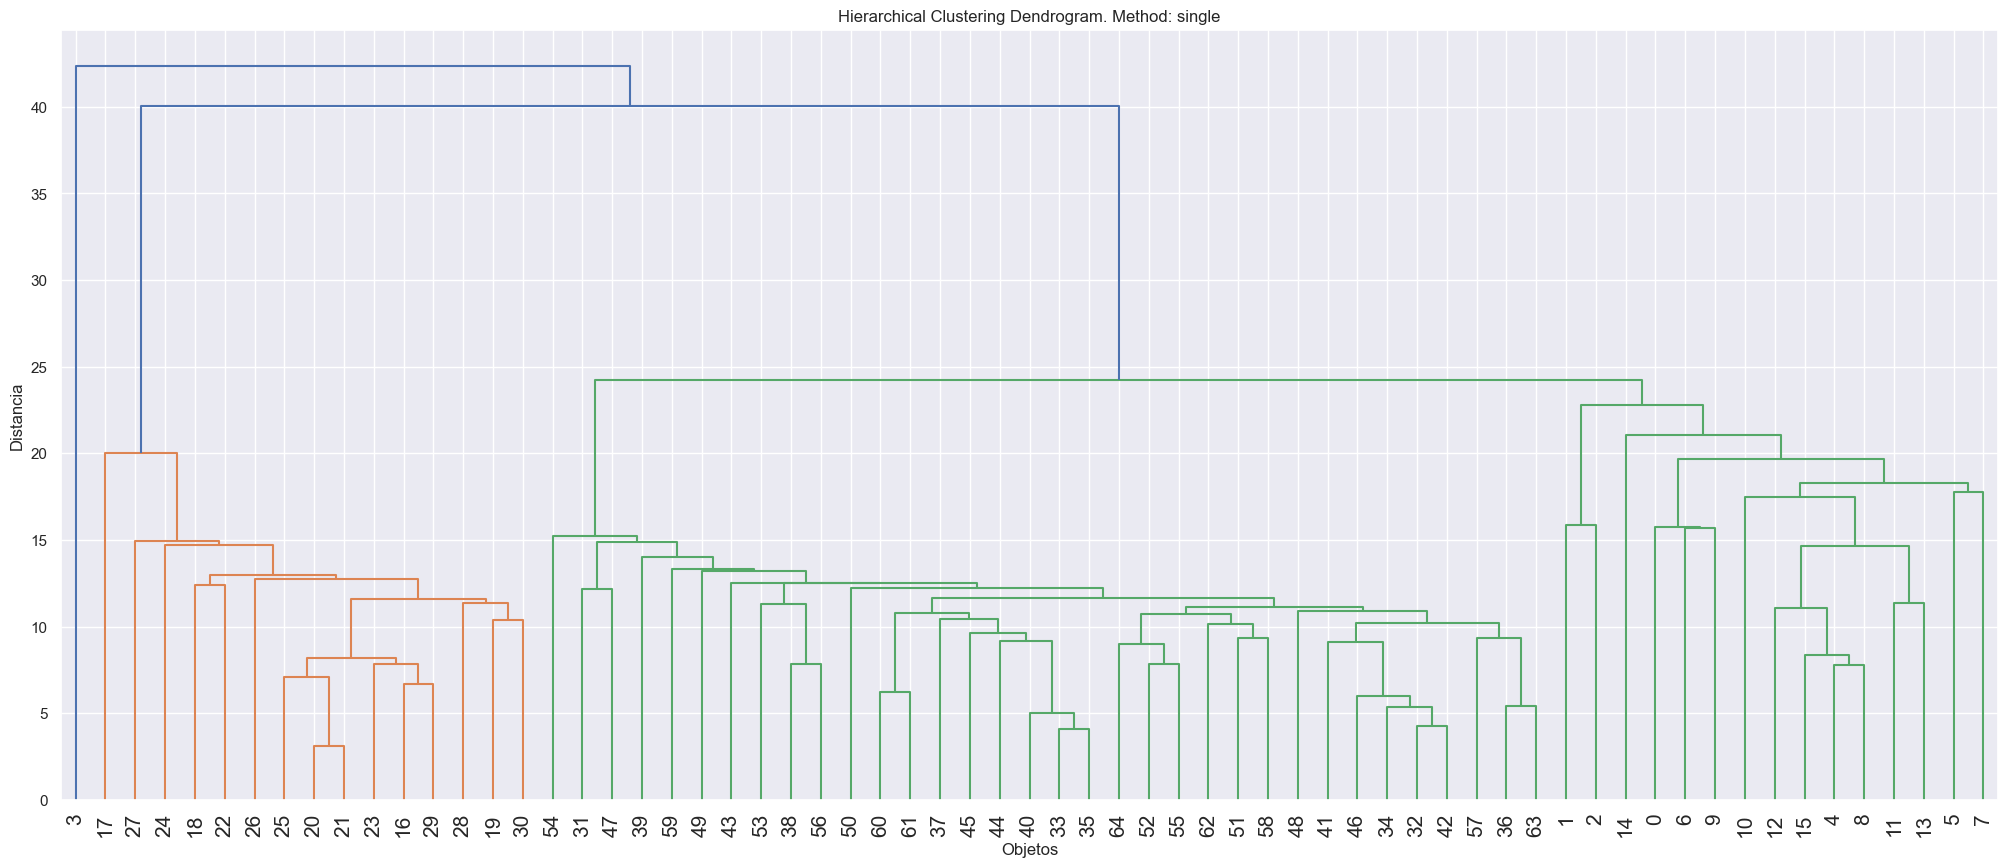

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram. Method: '+link)
plt.xlabel('Objetos')
plt.ylabel('Distancia')
dendrogram(
    link_mat,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

#### Dendograma con más información y un punto de corte para seleccionar clústers

In [7]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


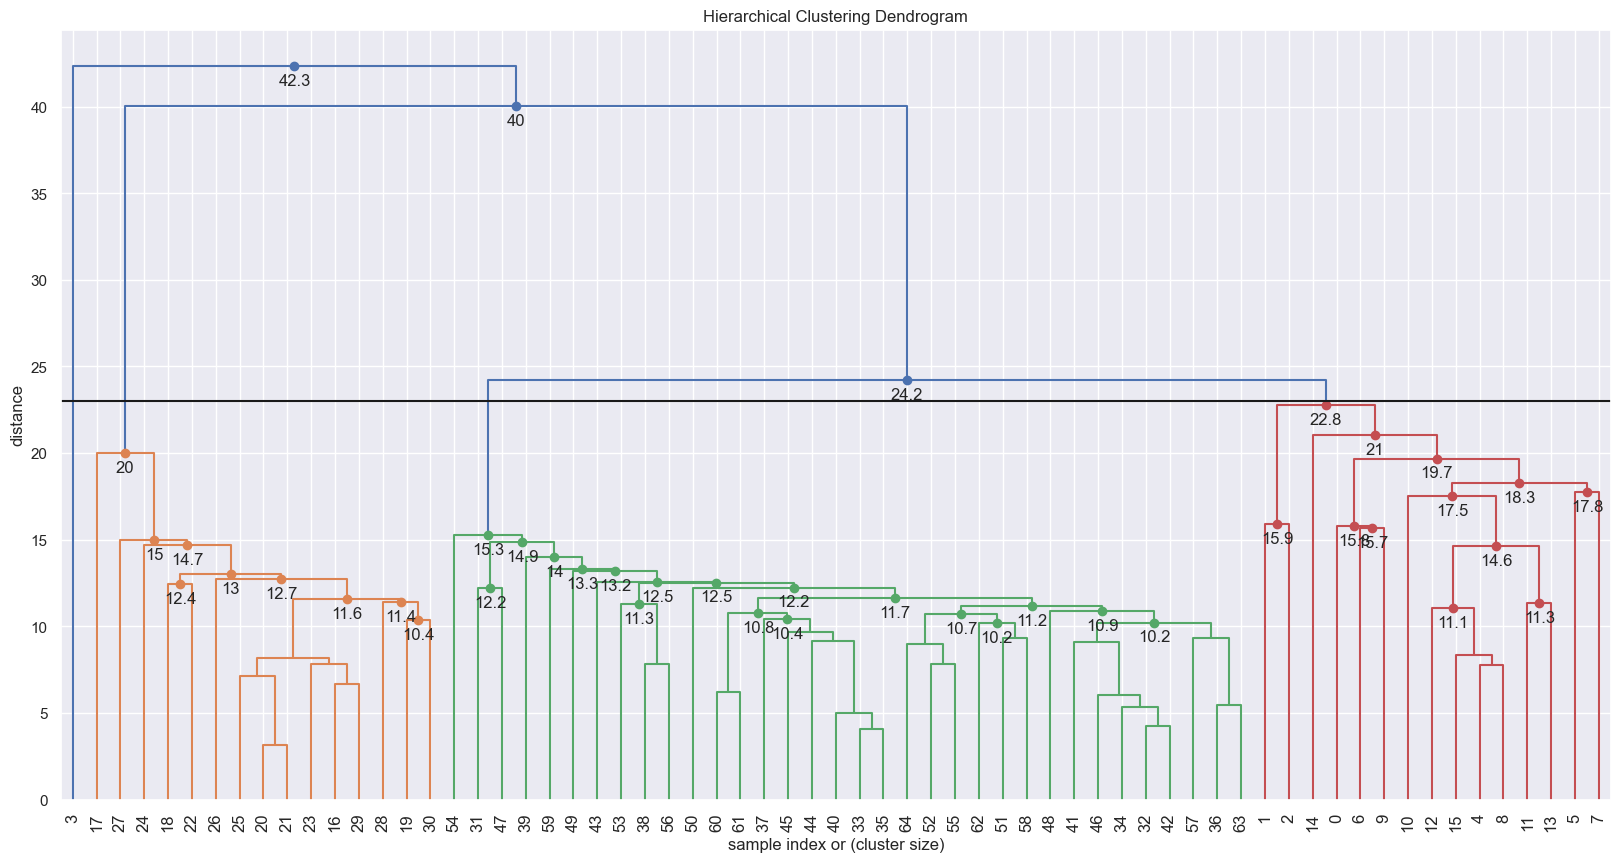

In [8]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

max_d = 23
fancy_dendrogram(
    link_mat,
    #truncate_mode='lastp',
    #p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Obtener la asignación de los objetos (datos) a cada clúster según cierto valor de distancia o especificación del número $k$ de clústers

In [9]:
obj_clus = fcluster(link_mat, max_d, criterion='distance')
data_clus = pd.DataFrame(data).assign(Cluster = obj_clus)
#print(data_clus)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(data_clus)
print(data_clus.to_string())

    AD.BD  AD.CD  EA.CD  Dx.CD  SH.ACR  EAD  beta  Cluster
0   65.56  166.0  50.55  12.80    70.3  115    14        3
1   50.91   93.9  61.82  13.09    75.0  121    20        3
2   46.15   80.8  64.10  11.80    70.0  120    25        3
3   70.29  220.5  50.00  12.75    61.1  113    12        4
4   63.16  144.0  57.89  12.98    64.9  115    14        3
5   50.72  134.6  56.23  11.88    52.6  136    14        3
6   58.99  164.0  54.96  12.46    58.6  109    11        3
7   55.38  144.0  52.31  11.92    65.3  131    16        3
8   64.29  138.5  57.14  12.50    60.0  115    16        3
9   65.67  169.2  50.75  12.46    55.3  117    20        3
10  55.91  113.0  60.22  12.47    64.5  121    16        3
11  64.62  134.6  52.31  13.23    75.0  124    12        3
12  62.07  128.6  56.90  12.41    61.5  119    17        3
13  59.26  128.0  51.85  11.39    73.3  125    19        3
14  57.94  182.5  60.32  12.54    66.0  105    11        3
15  57.14  147.4  61.22  11.63    64.3  115    11       

In [10]:
k = 4
obj_clus = fcluster(link_mat, k, criterion='maxclust')
data_clus = pd.DataFrame(data).assign(Cluster = obj_clus)
print(data_clus.to_string())

    AD.BD  AD.CD  EA.CD  Dx.CD  SH.ACR  EAD  beta  Cluster
0   65.56  166.0  50.55  12.80    70.3  115    14        3
1   50.91   93.9  61.82  13.09    75.0  121    20        3
2   46.15   80.8  64.10  11.80    70.0  120    25        3
3   70.29  220.5  50.00  12.75    61.1  113    12        4
4   63.16  144.0  57.89  12.98    64.9  115    14        3
5   50.72  134.6  56.23  11.88    52.6  136    14        3
6   58.99  164.0  54.96  12.46    58.6  109    11        3
7   55.38  144.0  52.31  11.92    65.3  131    16        3
8   64.29  138.5  57.14  12.50    60.0  115    16        3
9   65.67  169.2  50.75  12.46    55.3  117    20        3
10  55.91  113.0  60.22  12.47    64.5  121    16        3
11  64.62  134.6  52.31  13.23    75.0  124    12        3
12  62.07  128.6  56.90  12.41    61.5  119    17        3
13  59.26  128.0  51.85  11.39    73.3  125    19        3
14  57.94  182.5  60.32  12.54    66.0  105    11        3
15  57.14  147.4  61.22  11.63    64.3  115    11       

#### Usando `sklearn`. Detalles, ve en la documentación: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='single')
cluster.fit_predict(data)

print('Clusters: ',cluster.n_clusters_)

Clusters:  65


Observa que, se puede definir un número de clusters (`n_clusters`) o un criterio basado en la distancia `distance_threshold`. En este caso, como la distancia se pone en 0, no da una asignación específica de clusters a los datos. De hecho, el número de clústers es $n$.

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

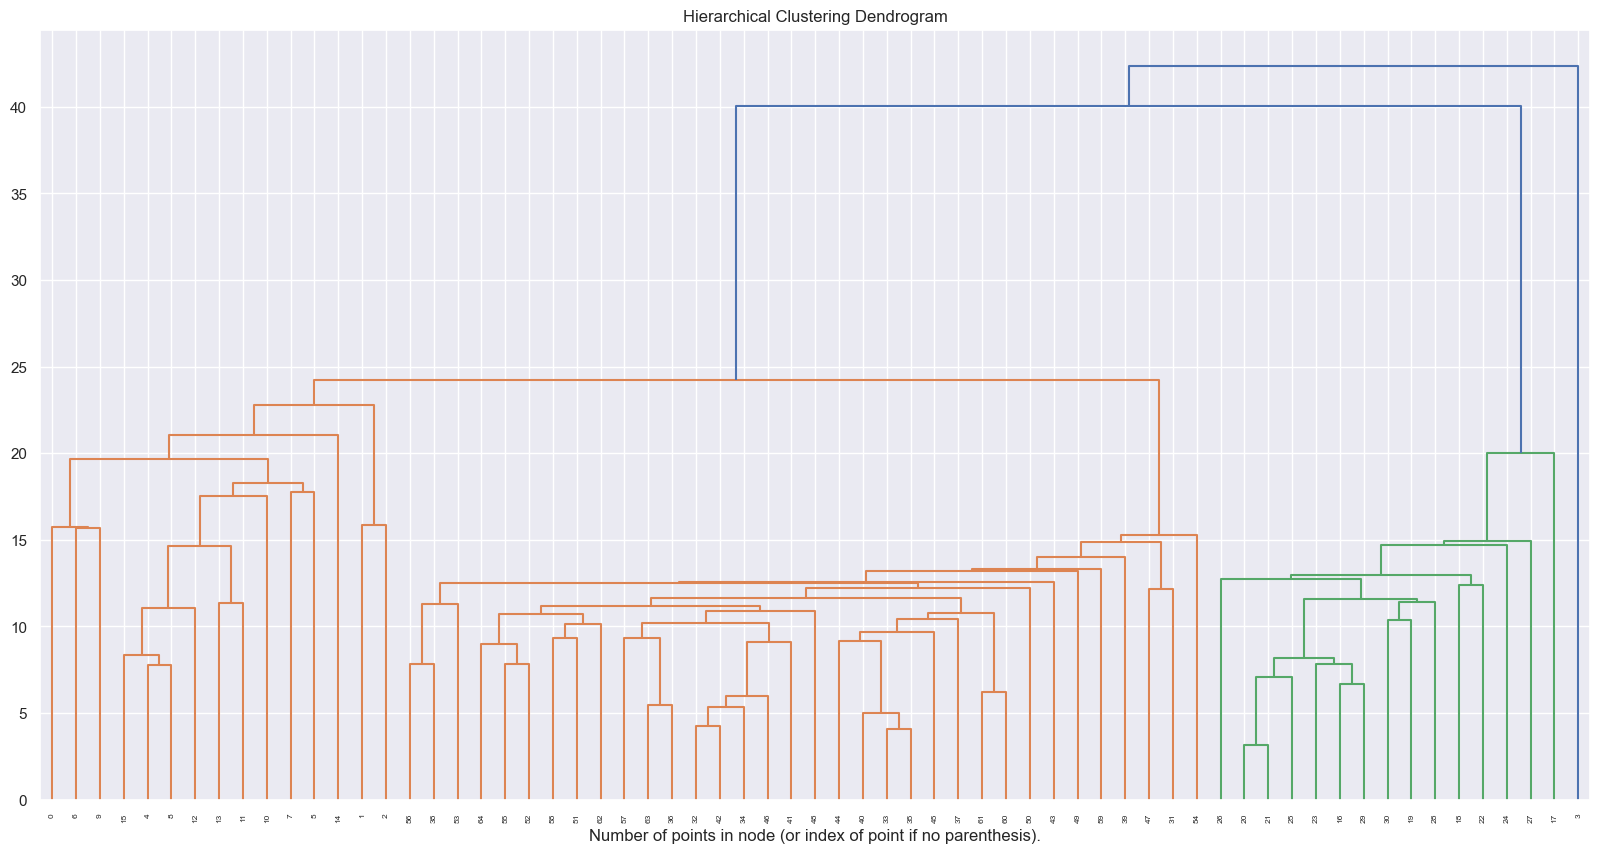

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster)
#plot_dendrogram(cluster, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

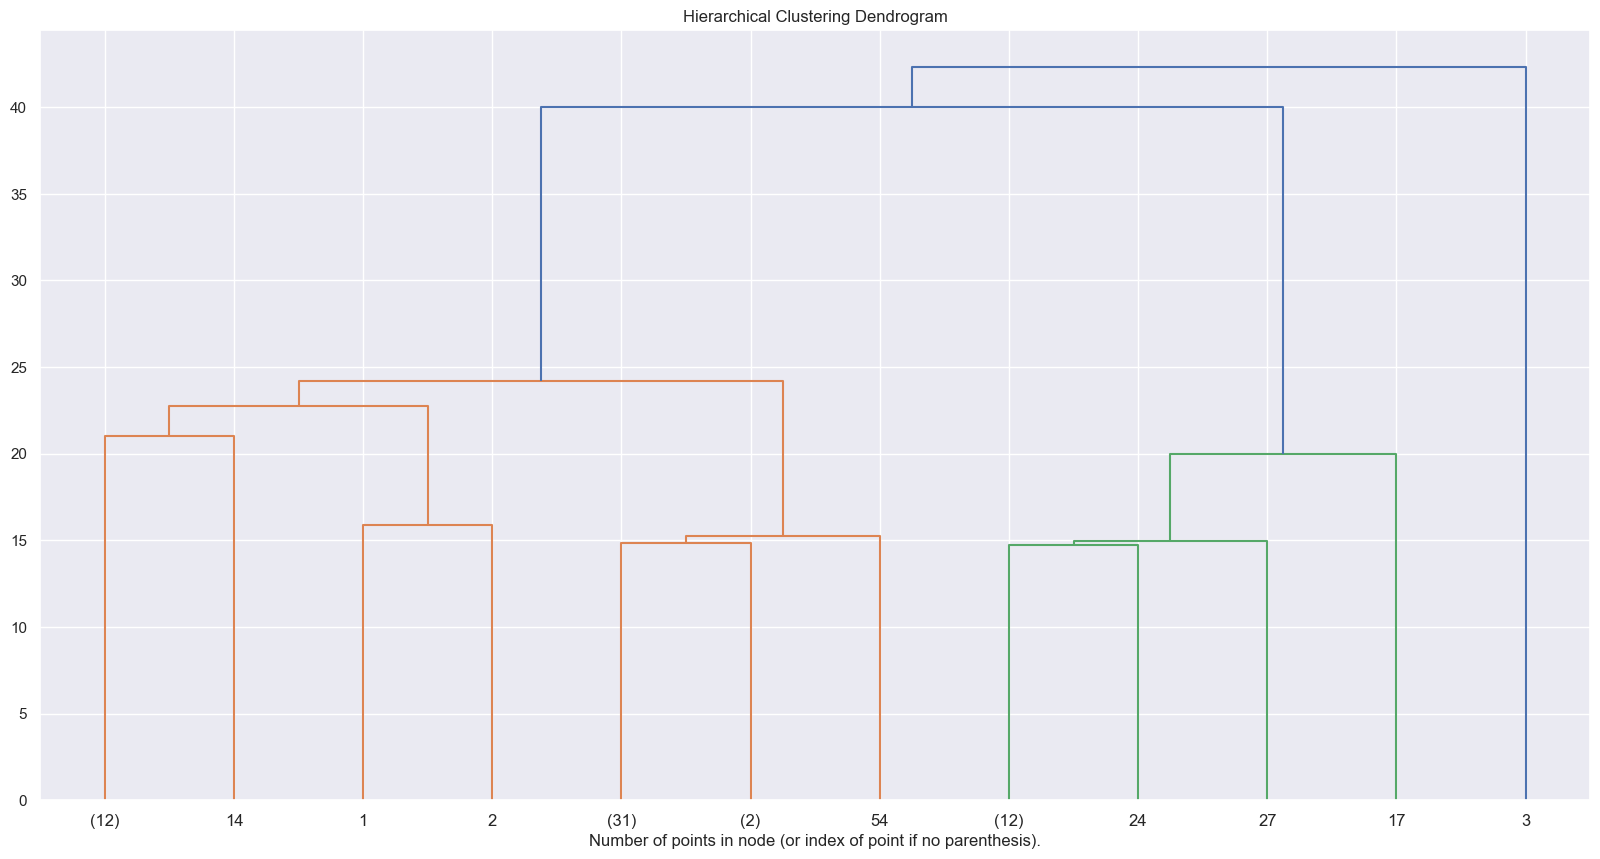

In [15]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
#plot_dendrogram(cluster)
plot_dendrogram(cluster, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Ahora, especifico el número de Clústers en 4

In [16]:
cluster2 = AgglomerativeClustering(n_clusters=4, distance_threshold=None, affinity='euclidean', 
                                  linkage='single')
cluster2.fit_predict(data)

print('Clusters: ',cluster2.n_clusters_)
data_clus2 = pd.DataFrame(data).assign(Cluster = cluster2.labels_)
print(data_clus2.to_string())

Clusters:  4
    AD.BD  AD.CD  EA.CD  Dx.CD  SH.ACR  EAD  beta  Cluster
0   65.56  166.0  50.55  12.80    70.3  115    14        0
1   50.91   93.9  61.82  13.09    75.0  121    20        0
2   46.15   80.8  64.10  11.80    70.0  120    25        0
3   70.29  220.5  50.00  12.75    61.1  113    12        3
4   63.16  144.0  57.89  12.98    64.9  115    14        0
5   50.72  134.6  56.23  11.88    52.6  136    14        0
6   58.99  164.0  54.96  12.46    58.6  109    11        0
7   55.38  144.0  52.31  11.92    65.3  131    16        0
8   64.29  138.5  57.14  12.50    60.0  115    16        0
9   65.67  169.2  50.75  12.46    55.3  117    20        0
10  55.91  113.0  60.22  12.47    64.5  121    16        0
11  64.62  134.6  52.31  13.23    75.0  124    12        0
12  62.07  128.6  56.90  12.41    61.5  119    17        0
13  59.26  128.0  51.85  11.39    73.3  125    19        0
14  57.94  182.5  60.32  12.54    66.0  105    11        0
15  57.14  147.4  61.22  11.63    64.3  115

/Users/vmac/virtualenv/ml24/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Clustering de observaciones y variables. El Heatmap

Como habíamos mencionado en clase, podemos hacer clústering de observaciones y variables eligiendo la medida de distancia (disimilaridad) apropiada.
En este ejemplo, usaremos distancia euclideana para las observaciones y la distancia de correlación para las variables

In [17]:
from scipy.spatial.distance import pdist, squareform

link_fun = 'single'
# distancia para observaciones
Y = data.transpose()
row_link = linkage(data, metric = 'euclidean', method=link_fun)
col_link = linkage(Y, metric = 'correlation', method = link_fun)

OJO: recuerda que la `correlación como distancia` no es lo mismo que la matriz de correlación. Checa tus notas de clase cuando vimos distancias... 

#### Clustering de observaciones (ya lo vimos pero lo repetimos)

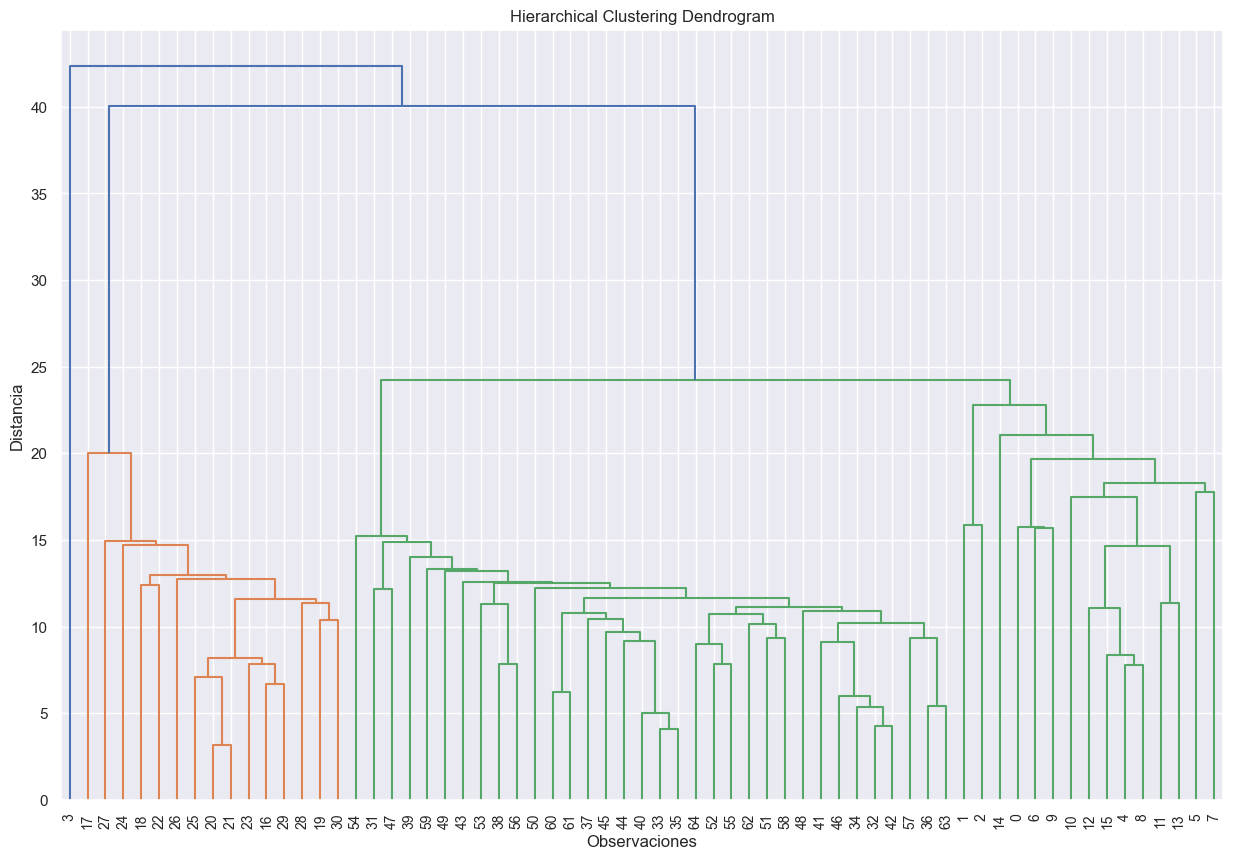

In [18]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    row_link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

#### Clustering de variables

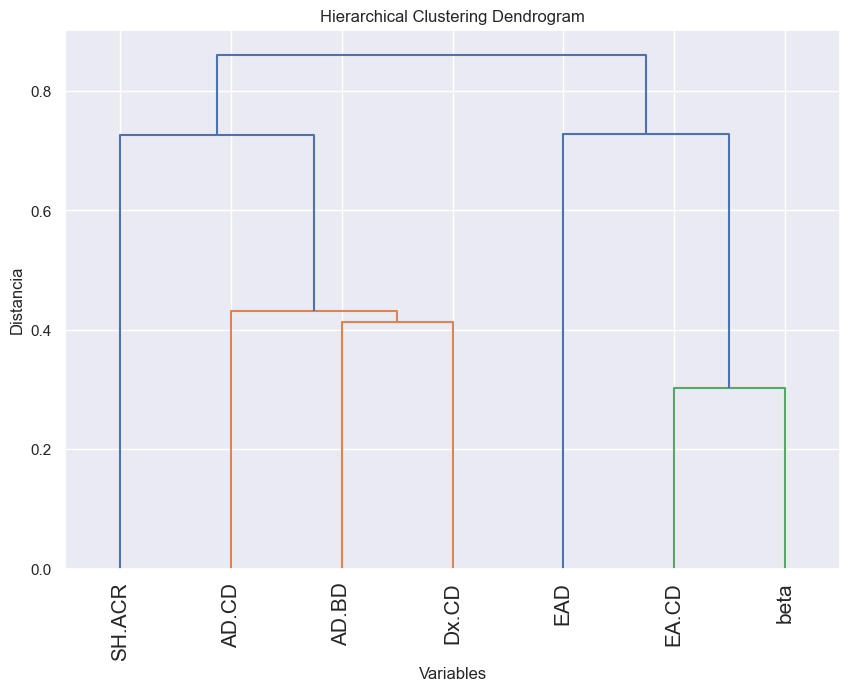

In [19]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distancia')
dendrogram(
    col_link,
    labels = list(data.columns),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

#### Todo junto en un heatmap que muestra las distancias (similaridades) entre las observaciones, ordenadas según los clústers jerárquicos para observaciones y variables.

Para detalles sobre las opciones de configuración del heatmap, ver la documentación de `seaborn.clustermap`

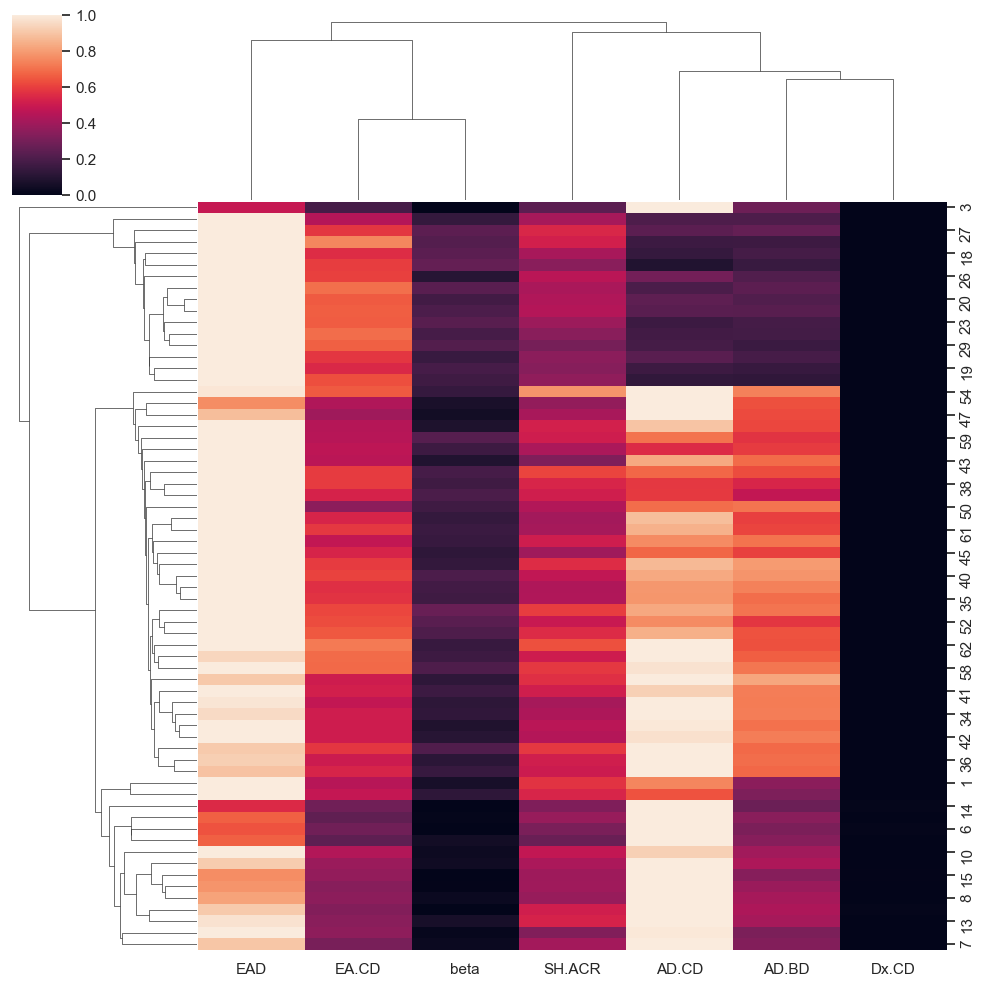

In [20]:
import seaborn as sns; sns.set()

link_fun = 'single'
row_link = linkage(data, method = link_fun)
col_link = linkage(data.corr(), method = link_fun)

g = sns.clustermap(data, row_linkage=row_link, col_linkage=col_link, standard_scale=0)

#### Solo para comparar, veamos qué nos proporciona PCA y el biplot

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


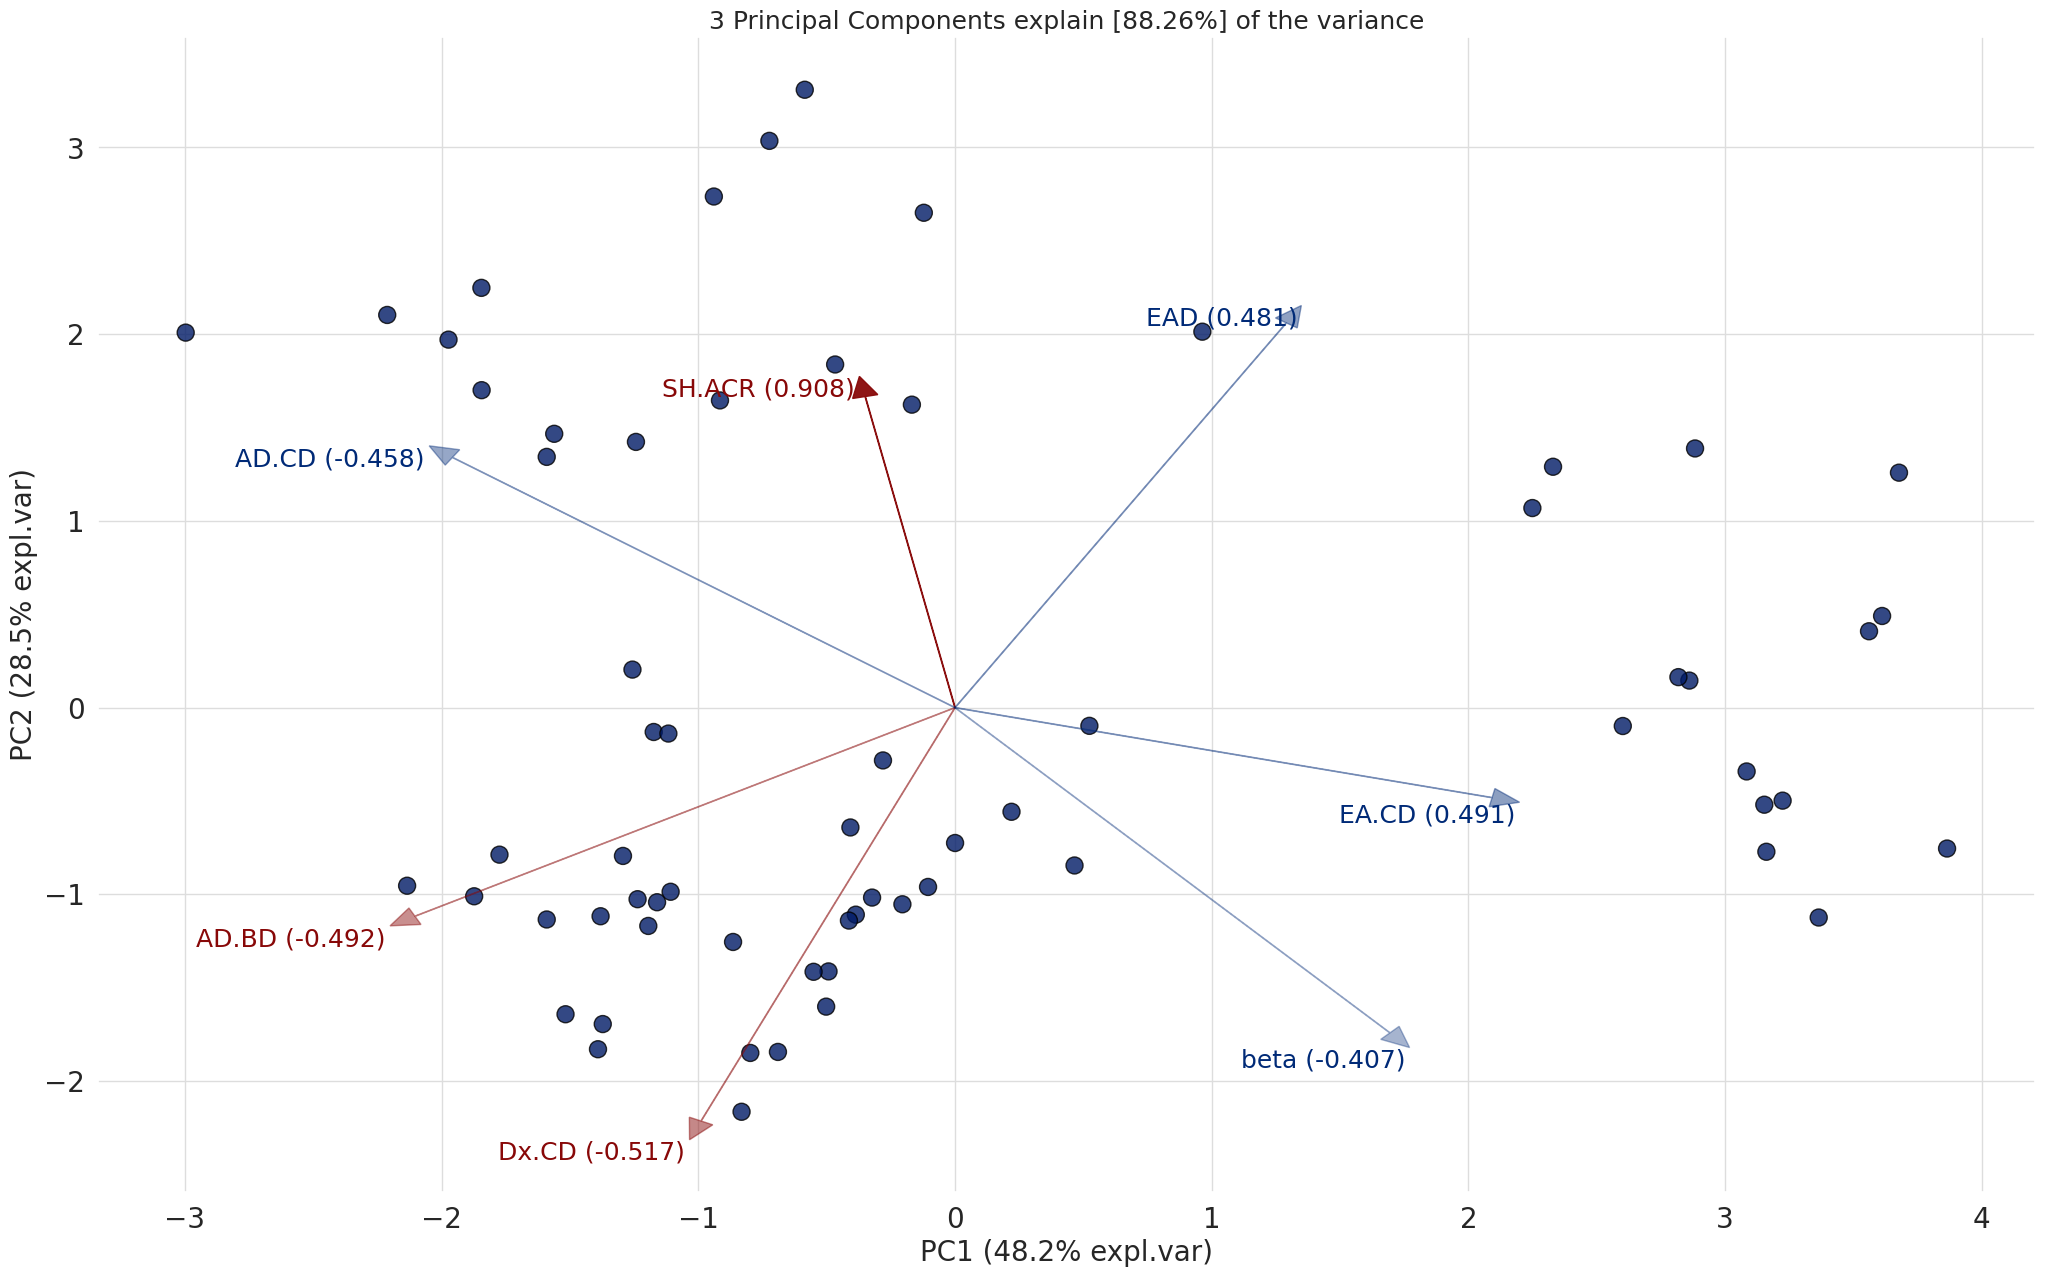

In [22]:
from sklearn.preprocessing import StandardScaler
from pca import pca

X = StandardScaler().fit_transform(data)
model = pca(n_components=3)
model.fit_transform(X, row_labels=data.index+1, col_labels=data.columns, verbose=False)
fig, ax = model.biplot()

### Ejemplo Gower. 

Tomado de https://github.com/wwwjk366/gower.

In [135]:
import numpy as np
import pandas as pd

Xd=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30],
'gender':['M','M','M','M','F','F','F','F'],
'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED'],
'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0],
'has_children':[1,0,1,1,1,0,0,1],
'available_credit':[2200,100,22000,1100,2000,100,6000,2200]})
Xd

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200
1,21,M,SINGLE,1200.0,0,100
2,19,M,SINGLE,32000.0,1,22000
3,30,M,SINGLE,1800.0,1,1100
4,21,F,MARRIED,2900.0,1,2000
5,21,F,SINGLE,1100.0,0,100
6,19,F,WIDOW,10000.0,0,6000
7,30,F,DIVORCED,1500.0,1,2200


Datos sintéticos. Ver la documentación para las distintas formas de especificar el tipo de variables en un data frame de Pandas.

In [136]:
# instalar con pip
import gower
from tabulate import tabulate

dm = gower.gower_matrix(Xd)
print('Matriz disimilaridad \n')
table = tabulate(dm, tablefmt="fancy_grid")
print(table)

Matriz disimilaridad 

╒══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ 0        │ 0.359024 │ 0.504073 │ 0.317874 │ 0.168728 │ 0.52623  │ 0.596979 │ 0.477788 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 0.359024 │ 0        │ 0.529764 │ 0.313877 │ 0.523629 │ 0.167206 │ 0.456002 │ 0.653964 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 0.504073 │ 0.529764 │ 0        │ 0.488614 │ 0.672801 │ 0.69697  │ 0.740428 │ 0.815194 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 0.317874 │ 0.313877 │ 0.488614 │ 0        │ 0.482479 │ 0.481083 │ 0.748186 │ 0.343323 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 0.168728 │ 0.523629 │ 0.672801 │ 0.482479 │ 0        │ 0.357502 │ 0.432373 │ 0.312104 │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────

Un detalle al usar `linkage` de `scipy`, es que el argumento $y$ de los datos debe ser una matriz de datos $n\times d$ o una matriz de distancias condensada, es decir, un arreglo que contenga la diagonal superior. Ver los detalles en la documentación de la función. 

In [137]:
# clustering (3 grupos)
Zd = linkage(dm, method = 'single') 
cld = fcluster(Zd, 3, criterion='maxclust')

data_clus3 = pd.DataFrame(Xd).assign(Cluster = cld)

print('Clustering \n')
data_clus3

Clustering 



/tmp/ipykernel_1128677/1825465720.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Zd = linkage(dm, method = 'single')


,age,gender,civil_status,salary,has_children,available_credit,Cluster
0,21,M,MARRIED,3000.0,1,2200,2
1,21,M,SINGLE,1200.0,0,100,1
2,19,M,SINGLE,32000.0,1,22000,3
3,30,M,SINGLE,1800.0,1,1100,2
4,21,F,MARRIED,2900.0,1,2000,2
5,21,F,SINGLE,1100.0,0,100,1
6,19,F,WIDOW,10000.0,0,6000,1
7,30,F,DIVORCED,1500.0,1,2200,2


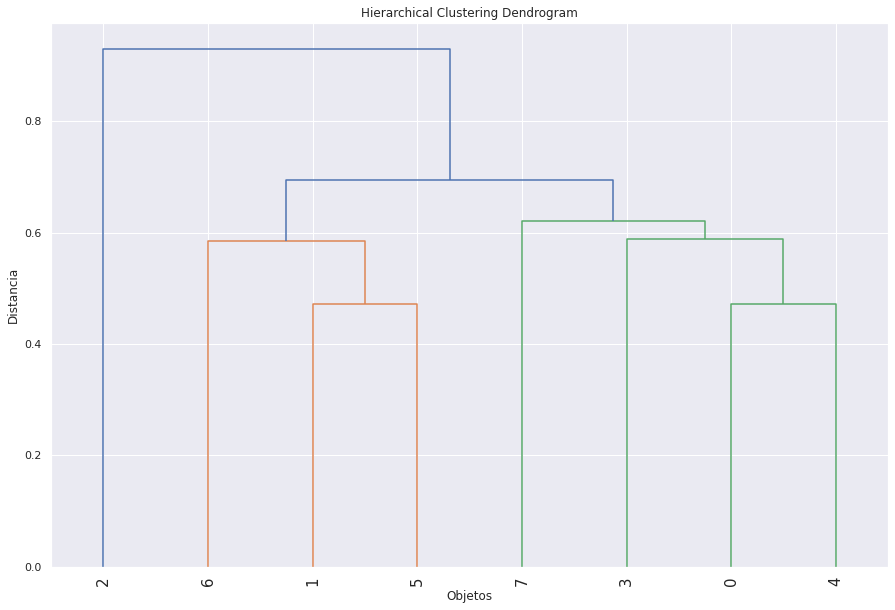

In [138]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Objetos')
plt.ylabel('Distancia')
dendrogram(Zd, leaf_rotation=90., leaf_font_size=15.,)
plt.show()

In [139]:
cluster_gower = AgglomerativeClustering(n_clusters=3, distance_threshold=None, affinity='precomputed', 
                                  linkage='single')
cld2 = cluster_gower.fit_predict(dm)
data_clus4 = pd.DataFrame(Xd).assign(Cluster = cld2)
print('Clustering \n')
data_clus4

Clustering 



,age,gender,civil_status,salary,has_children,available_credit,Cluster
0,21,M,MARRIED,3000.0,1,2200,2
1,21,M,SINGLE,1200.0,0,100,0
2,19,M,SINGLE,32000.0,1,22000,1
3,30,M,SINGLE,1800.0,1,1100,0
4,21,F,MARRIED,2900.0,1,2000,2
5,21,F,SINGLE,1100.0,0,100,0
6,19,F,WIDOW,10000.0,0,6000,0
7,30,F,DIVORCED,1500.0,1,2200,2


Alternativamente, con la función de `sklearn` puedes pasar directamente una matriz de distancias con la opción  `affinity = precomputed`

Para aplicaciones con la disimilaridad de Gower, sugiero construir la matriz de distancias usando la función `daisy()` de la librería `cluster` de R, y después, usar cualquier método de clustering en el software que prefieran.